# データ解析のための統計モデリング入門
## 5章 GLMの尤度比検定と検定の非対称性
### 5.4 帰無仮説を棄却するための有意水準

In [1]:
d <- read.csv("../prepared/chapter5/data3a.csv")
summary(d)

       y               x          f     
 Min.   : 2.00   Min.   : 7.190   C:50  
 1st Qu.: 6.00   1st Qu.: 9.428   T:50  
 Median : 8.00   Median :10.155         
 Mean   : 7.83   Mean   :10.089         
 3rd Qu.:10.00   3rd Qu.:10.685         
 Max.   :15.00   Max.   :12.400         

In [3]:
fit1 <- glm(d$y ~ 1, data = d, family = poisson)
fit2 <- glm(d$y ~ x, data = d, family = poisson)

In [4]:
fit2$deviance

[1] 84.993

In [5]:
fit1$deviance

[1] 89.50694

In [6]:
fit1$deviance - fit2$deviance

[1] 4.513941

In [7]:
d$y.rnd <- rpois(100, lambda = mean(d$y))

In [8]:
fit1 <- glm(y.rnd ~ 1, data = d, family = poisson)
fit2 <- glm(y.rnd ~ x, data = d, family = poisson)
fit1$deviance - fit2$deviance

[1] 3.107664

In [11]:
source("../prepared/chapter5/pb.R")
dd12 <- pb(d, n.bootstrap = 1000)

# ..................................................
# ..................................................
# ..................................................
# ..................................................
# ..................................................
# ..................................................
# ..................................................
# ..................................................
# ..................................................
# ..................................................
# ..................................................
# ..................................................
# ..................................................
# ..................................................
# ..................................................
# ..................................................
# ..................................................
# ..................................................
# ............................................

In [12]:
summary(dd12)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.00000  0.09046  0.47182  1.02493  1.36155 12.01248 

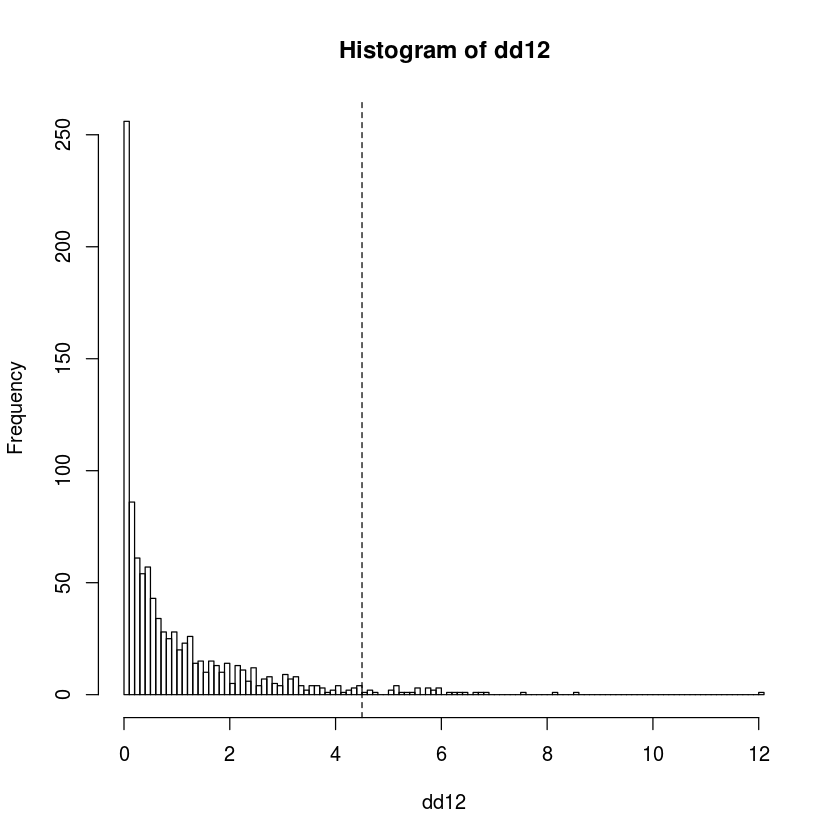

In [13]:
hist(dd12, 100)
abline(v = 4.5, lty = 2)

In [14]:
sum(dd12 >= 4.5)

[1] 35

In [15]:
quantile(dd12, 0.95)

95% 
3.958199

In [17]:
fit1 <- glm(y ~ 1, data = d, family = poisson)
fit2 <- glm(y ~ x, data = d, family = poisson)
anova(fit1, fit2, test = "Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
99,89.50694,NA,NA,NA
98,84.99300,1,4.513941,0.03361969
